# Explore here

In [218]:
# Your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np


In [219]:
# Load the training set 
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")  

In [220]:
print(total_data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [221]:
#grabbing column
total_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [222]:
#looking for missing data
print("Total missing value for each column")
print(total_data.isnull().sum(axis=0))

Total missing value for each column
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [223]:
print(total_data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [225]:
# Assuming you have your data stored in variables x_data and y_data
X_train, X_test, y_train, y_test = train_test_split(total_data, total_data, test_size=0.2, random_state=42)


# Separate features and target variable
X_train = total_data.drop("Outcome", axis=1) 
y_train = total_data["Outcome"]
X_test = total_data.drop("Outcome", axis=1)
y_test = total_data["Outcome"]




In [226]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [227]:
y_train

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [228]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [229]:
y_test

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

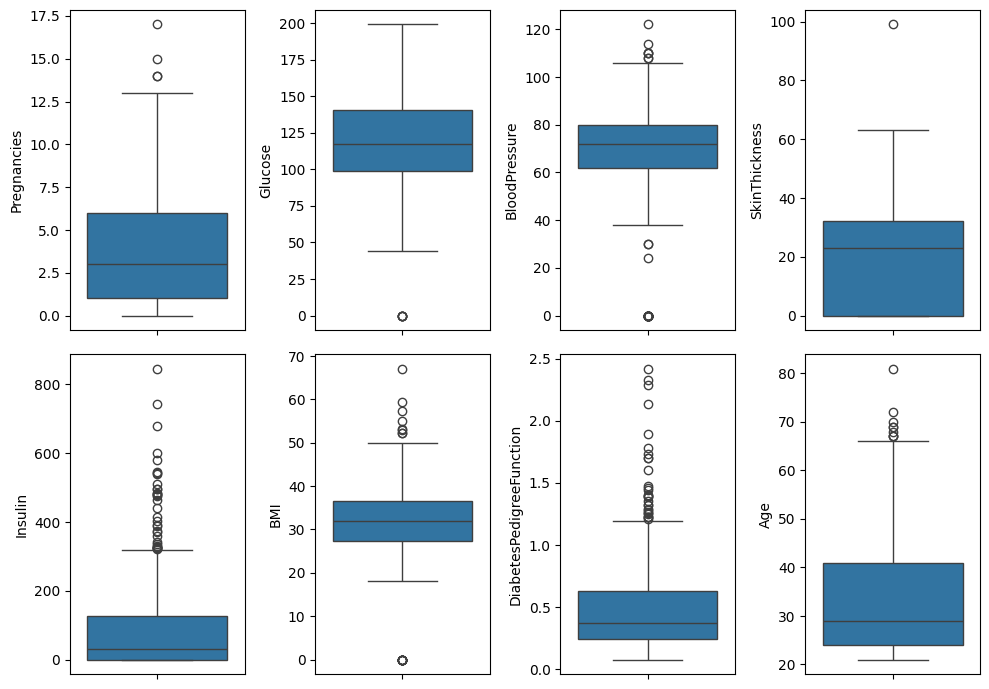

In [230]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(2, 4, figsize=(10, 7))

sns.boxplot(ax=axis[0, 0], data=X_train, y="Pregnancies")  # Corrected spelling
sns.boxplot(ax=axis[0, 1], data=X_train, y="Glucose")
sns.boxplot(ax=axis[0, 2], data=X_train, y="BloodPressure")
sns.boxplot(ax=axis[0, 3], data=X_train, y="SkinThickness")
sns.boxplot(ax=axis[1, 0], data=X_train, y="Insulin")
sns.boxplot(ax=axis[1, 1], data=X_train, y="BMI")
sns.boxplot(ax=axis[1, 2], data=X_train, y="DiabetesPedigreeFunction")
sns.boxplot(ax=axis[1, 3], data=X_train, y="Age")

plt.tight_layout()
plt.show()


In [243]:
# Convert columns to float
X_train = X_train.astype({'Pregnancies': 'float', 'BloodPressure': 'float', 'SkinThickness': 'float', 'Insulin': 'float', 'BMI': 'float', 'DiabetesPedigreeFunction': 'float', 'Age': 'float'})
X_test = X_test.astype({'Pregnancies': 'float', 'BloodPressure': 'float', 'SkinThickness': 'float', 'Insulin': 'float', 'BMI': 'float', 'DiabetesPedigreeFunction': 'float', 'Age': 'float'})



In [248]:
def replace_outliers(x_train, x_test):
    columns = x_train.columns

    # This loop will replace outliers for each column
    for column in columns:
        # Calculate Q_25 and Q_75 for the column using the data from the x_train set
        Q_25 = x_train[column].quantile(0.25)
        Q_75 = x_train[column].quantile(0.75)

        # Calculate the IQR
        IQR = Q_75 - Q_25

        # Calculate the upper and lower limit
        upper_limit = Q_75 + 1.5*IQR
        lower_limit = Q_25 - 1.5*IQR

        # Replace the outliers that are below the lower limit with the Q_25 value for both the training and test sets
        x_train.loc[x_train[column] < lower_limit, column] = Q_25
        x_test.loc[x_test[column] < lower_limit, column] = Q_25

        # Replace the outliers that are above the upper limit with the Q_75 value for both the training and test sets
        x_train.loc[x_train[column] > upper_limit, column] = Q_75
        x_test.loc[x_test[column] > upper_limit, column] = Q_75
    
    return x_train, x_test

In [245]:
X_train, X_test = replace_outliers(X_train, X_test)

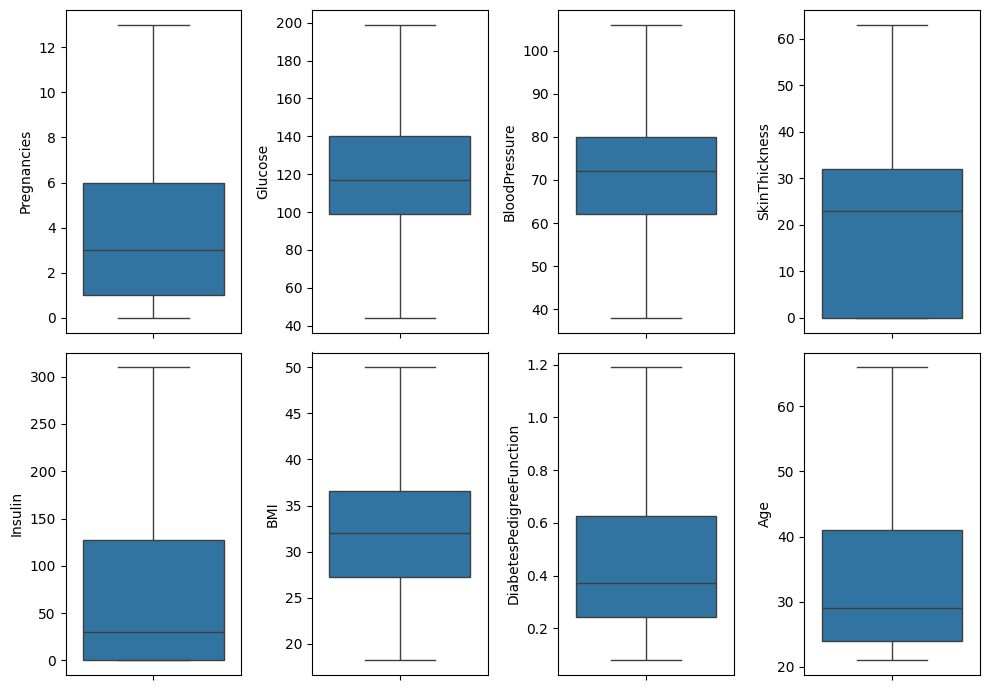

In [246]:
fig, axis = plt.subplots(2, 4, figsize=(10, 7))

sns.boxplot(ax=axis[0, 0], data=X_train, y="Pregnancies")  # Corrected spelling
sns.boxplot(ax=axis[0, 1], data=X_train, y="Glucose")
sns.boxplot(ax=axis[0, 2], data=X_train, y="BloodPressure")
sns.boxplot(ax=axis[0, 3], data=X_train, y="SkinThickness")
sns.boxplot(ax=axis[1, 0], data=X_train, y="Insulin")
sns.boxplot(ax=axis[1, 1], data=X_train, y="BMI")
sns.boxplot(ax=axis[1, 2], data=X_train, y="DiabetesPedigreeFunction")
sns.boxplot(ax=axis[1, 3], data=X_train, y="Age")

plt.tight_layout()
plt.show()

In [234]:
#checking Missing Value
print("Total missing values for each column in our X_train:")
print(X_train.isnull().sum(axis=0))

Total missing values for each column in our X_train:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [235]:
# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)



In [236]:
# Train the model with the training data
gb_clf.fit(X_train, y_train)  # Make sure this line is executed before making predictions



GradientBoostingClassifier(random_state=42)

In [237]:
# Predict on the test set
y_pred = gb_clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Model Accuracy: {accuracy:.4f}")

Gradient Boosting Model Accuracy: 0.8893


In [238]:
from sklearn.model_selection import GridSearchCV

In [239]:
#Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],  # Shrinks the contribution of each tree
    'max_depth': [3, 4, 5],  # Maximum depth of the individual regression estimators
}



In [240]:

# Initialize GridSearchCV with the estimator and parameter grid
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                           param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score achieved
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best accuracy score from GridSearchCV: {grid_search.best_score_:.4f}")


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best accuracy score from GridSearchCV: 0.7747


In [241]:
# Use the best estimator for predictions
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

# Evaluate the best estimator on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best model: {accuracy:.4f}")


Accuracy of the best model: 0.8203


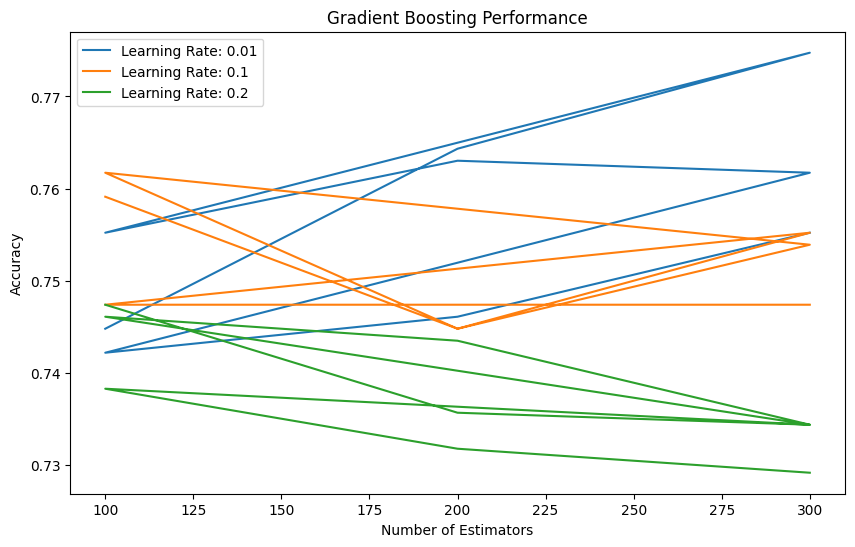

In [242]:
# Plotting
plt.figure(figsize=(10, 6))
results = pd.DataFrame(grid_search.cv_results_)
for lr in param_grid['learning_rate']:
    temp = results[results.param_learning_rate==lr]
    plt.plot(temp.param_n_estimators, temp.mean_test_score, label=f'Learning Rate: {lr}')

plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Gradient Boosting Performance')
plt.show()